In [1]:
import pandas as pd
import numpy as np
import nltk
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [14]:
# Load the data
file_path = 'headlines/merged_file.csv'
data = pd.read_csv(file_path)

In [15]:
# Download VADER lexicon
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khanhdo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Define sentiment categorization function
def sentiment_categorize(text):
    ss = sid.polarity_scores(text)
    if ss['compound'] > 0.5:
        return 'Positive'
    elif ss['compound'] < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
# Apply sentiment categorization
data['headline_sentiment'] = data['headline'].apply(sentiment_categorize)


In [18]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,headline_sentiment
0,Kissinger's Nobel Cash Goes to Children of G.I.'s,1973-12-01,https://www.nytimes.com/1973/12/01/archives/ki...,article,"OSLO, Nov. 30 (Reuters)—Secretary of State Kis...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral
1,Notes on People,1973-12-01,https://www.nytimes.com/1973/12/01/archives/a-...,article,"Unassisted except for crutches, Edward M. Kenn...",Archives,Albin Krebs,Archives,NaN,['Vietnam'],Neutral
2,U.S. Plans to Seek New Nuclear Arms In Case Ta...,1973-12-01,https://www.nytimes.com/1973/12/01/archives/us...,article,"WASHINGTON, Nov. 30—Secretary of Defense James...",Archives,By John W. Finney Special to The New York Times,Archives,NaN,['Vietnam'],Negative
3,War Isn't Over For Them—Their Son Must Stay in...,1973-12-02,https://www.nytimes.com/1973/12/02/archives/wa...,article,"SHARON, Vt. — Very few people here have ?? to ...",Archives,By Gloria Emerson Special to The New York Times,Archives,NaN,[],Negative
4,WAR HERO FACES COCAINE CHARGES,1973-12-03,https://www.nytimes.com/1973/12/03/archives/wa...,article,"PETALUMA, Calif., Dec. 2 —“Heroes are just ord...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral


In [19]:
# Define function to scale sentiment scores
def scale_score(text):
    ss = sid.polarity_scores(text)
    score = round((ss['compound'] + 1) * 5, 2)
    return score


In [20]:
# Apply sentiment score scaling
data['headline_sentiment_score'] = data['headline'].apply(scale_score)

In [21]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,headline_sentiment,headline_sentiment_score
0,Kissinger's Nobel Cash Goes to Children of G.I.'s,1973-12-01,https://www.nytimes.com/1973/12/01/archives/ki...,article,"OSLO, Nov. 30 (Reuters)—Secretary of State Kis...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral,5.00
1,Notes on People,1973-12-01,https://www.nytimes.com/1973/12/01/archives/a-...,article,"Unassisted except for crutches, Edward M. Kenn...",Archives,Albin Krebs,Archives,NaN,['Vietnam'],Neutral,5.00
2,U.S. Plans to Seek New Nuclear Arms In Case Ta...,1973-12-01,https://www.nytimes.com/1973/12/01/archives/us...,article,"WASHINGTON, Nov. 30—Secretary of Defense James...",Archives,By John W. Finney Special to The New York Times,Archives,NaN,['Vietnam'],Negative,2.29
3,War Isn't Over For Them—Their Son Must Stay in...,1973-12-02,https://www.nytimes.com/1973/12/02/archives/wa...,article,"SHARON, Vt. — Very few people here have ?? to ...",Archives,By Gloria Emerson Special to The New York Times,Archives,NaN,[],Negative,2.00
4,WAR HERO FACES COCAINE CHARGES,1973-12-03,https://www.nytimes.com/1973/12/03/archives/wa...,article,"PETALUMA, Calif., Dec. 2 —“Heroes are just ord...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral,3.30


In [22]:
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year and month for aggregation
data['year_month'] = data['date'].dt.to_period('M')

In [23]:
# Aggregate sentiment scores by month
sentiment_by_month = data.groupby('year_month').agg({
    'headline_sentiment_score': 'mean',
}).reset_index()

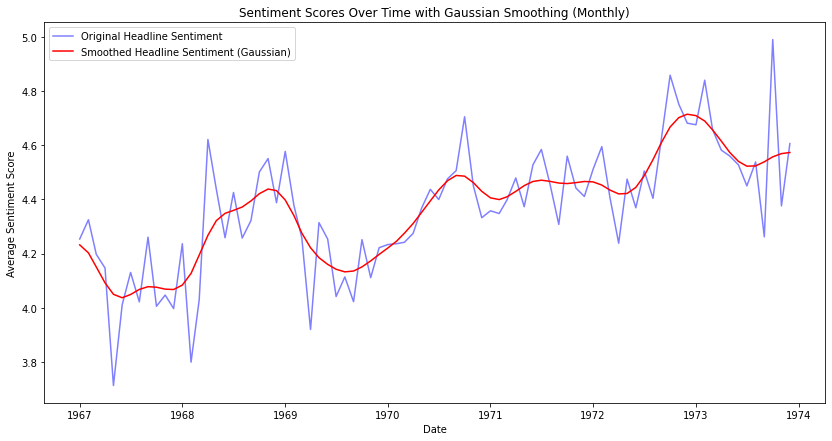

In [24]:
# Apply Gaussian filter for smoothing
sigma = 2  # Standard deviation for Gaussian kernel
sentiment_by_month['smoothed_sentiment'] = gaussian_filter1d(sentiment_by_month['headline_sentiment_score'], sigma=sigma)

# Plot the sentiment scores with Gaussian smoothing
plt.figure(figsize=(14, 7))

# Headline sentiment over time
plt.plot(sentiment_by_month['year_month'].dt.to_timestamp(), sentiment_by_month['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_month['year_month'].dt.to_timestamp(), sentiment_by_month['smoothed_sentiment'], label='Smoothed Headline Sentiment (Gaussian)', color='red')

plt.title('Sentiment Scores Over Time with Gaussian Smoothing (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

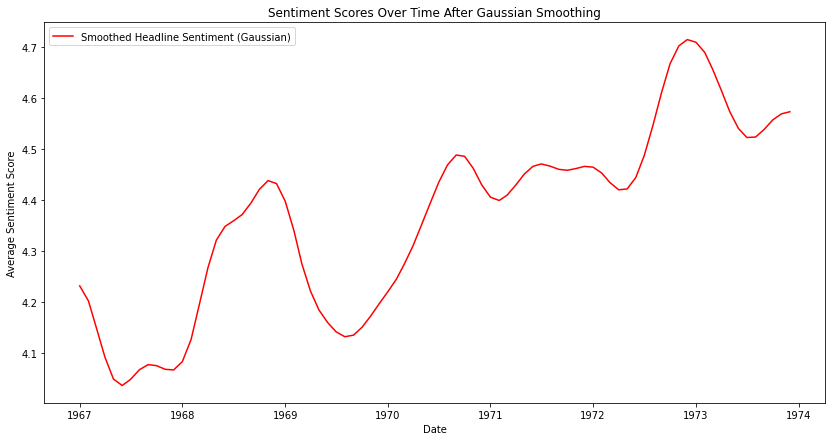

In [35]:
# Apply Gaussian filter for smoothing
sigma = 2  # Standard deviation for Gaussian kernel
sentiment_by_month['smoothed_sentiment'] = gaussian_filter1d(sentiment_by_month['headline_sentiment_score'], sigma=sigma)

# Plot the sentiment scores with Gaussian smoothing
plt.figure(figsize=(14, 7))

# Headline sentiment over time
# plt.plot(sentiment_by_month['year_month'].dt.to_timestamp(), sentiment_by_month['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_month['year_month'].dt.to_timestamp(), sentiment_by_month['smoothed_sentiment'], label='Smoothed Headline Sentiment (Gaussian)', color='red')

plt.title('Sentiment Scores Over Time After Gaussian Smoothing')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

In [26]:
!pip install --upgrade pip 

!pip install --upgrade Pillow



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 407.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [27]:
!pip install wordcloud

In [28]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [29]:
# Generate word clouds for positive and negative sentiments
positive_text = ' '.join(data[data['headline_sentiment'] == 'Positive']['headline'])

print(positive_text)

The Peace Treaty Was Signed, Americans Went Home Nobel Prizes Awarded; King Olav Jeered Vietcong Chief Sees No Peace Gain Since Truce Daniel Berrigan's Speech to Arabs Stirs a Furor Over Award East Bloc's Truce Units Said Help Free American Souvanna Hopeful on Impact of Kissinger‐Tho Talks New Bid Made to Free Vietnam Truce Observers Compromise Near to Free Truce Aides Unwritten Peace Appears To Prevail for the Laotians Peace With Honor Vietnam Bonus Backed Chinese Once More Giving Foreigners Chance to See Kweilin Scenery That Inspired Ancient Artists Vietnam Medal of Honor Winner Killed in Detroit Store Holdup Nixon Praises Workers Who Stayed on the Job The Great Turnpike Bust Politics vs. Justice Capitol Peace Group Is Met by Mrs. Abzug PARIS PEACE TALKS INTO FOURTH YEAR The Liberty Lobby Agnew Says Hanoi Stalls On P.O.W.'s to Gain in Talks Methodist Unit Asks Peace Peace Talks Session Put Off Students in Indiana At Peace Assembly Register for Voting McCarthy Hints Readiness To Lead 

In [30]:
def generate_word_cloud(text, title):
    custom_stopwords = set(STOPWORDS)
    custom_stopwords.update(["say", "talk", "said", "says", "talked", "talking", "saying", "says", "talks", "call", "called", "calling", "calls", "will", "OP", "G", "O", "P", "seen", "report", "take", "today"])

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

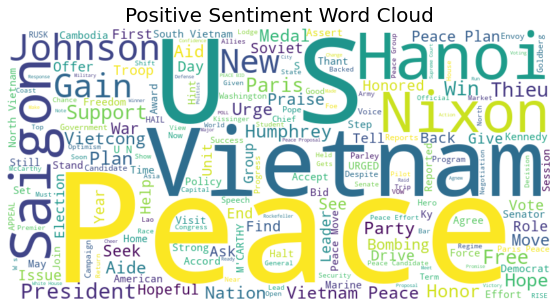

In [31]:
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')

In [32]:
negative_text = ' '.join(data[data['headline_sentiment'] == 'Negative']['headline'])

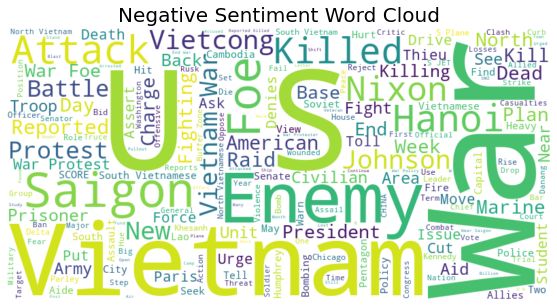

In [33]:
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')